# This script is used to compare the performance of different denoising methods.

### Methods compared:
1. Filtering (Median, Bilateral)
2. Fully Convolutional Denoising Network (FC-DN)
3. Denoising Autoencoder (DAE)

## Import necessary elements and define functions

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

### 1. Filtering (Median, Bilateral)

In [ ]:
def pre_process_filtering(original_img, gaussian_filtering=False, median_filtering=False ,show_image=False, apply_bilateral= False, sharpen_image=False, fontsize=10, figsize=8):
    """Preprocess image by applying gaussian filtering, median filtering, bilateral filtering and sharpening.
    Args:
        original_img (numpy.ndarray): Original image.
        median_filtering (bool): Apply median filtering.
        apply_bilateral (bool): Apply bilateral filtering.
        gaussian_filtering (bool): Apply gaussian filtering.
        sharpen_image (bool): Apply sharpening.
        show_image (bool): Show original image alongside preprocessed image.
        fontsize (int): Font size for title.
        figsize (int): Figure size.
    Returns:
        preprocessed_img (numpy.ndarray): Preprocessed image.

    Example:
        >>> _=pre_process_image(testing_image, median_filtering= True, apply_bilateral= True)
    """

    # convert to grayscale
    img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    
    if median_filtering:
        # apply median filtering
        img = cv2.medianBlur(img, 5)
    
    # apply bilateral filtering
    if apply_bilateral:
        # the input of bilateral filter is the image, diameter of each pixel neighborhood, sigmaColor, sigmaSpace
        # their meaning is: 
        # diameter of each pixel neighborhood - how large the area of each pixel is considered when filtering
        # sigmaColor - how large the color range is considered when filtering
        # sigmaSpace - how large the distance range is considered when filtering
        
        img = cv2.bilateralFilter(img, 15, 2, 2)
    
    
    if gaussian_filtering:
        # apply gaussian blur
        img = cv2.GaussianBlur(img, (3, 3), 0)
    
    preprocessed_img = img

    if sharpen_image:
        # sharpen image
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        preprocessed_img = cv2.filter2D(preprocessed_img, -1, kernel)

    if show_image:
        # show original image alongside preprocessed image
        fig, ax = plt.subplots(1, 2, figsize=(figsize, figsize))
        ax[0].imshow(original_img)
        ax[0].set_title('Original Image', fontsize=fontsize)
        ax[1].imshow(preprocessed_img, cmap='gray')
        # Compose a string to show which transformations were applied
        transformation_string =  ''
        if apply_bilateral:
            transformation_string += 'Bilateral Filtering, '
        if median_filtering:
            transformation_string += 'Median Filtering, '
        if gaussian_filtering:
            transformation_string += 'Gaussian Filtering, '
        if sharpen_image:
            transformation_string += 'Sharpening, '
        transformation_string = transformation_string[:-2]
        ax[1].set_title('Preprocessed Image\n' + transformation_string, fontsize=fontsize)
        
    return preprocessed_img

### 2. Fully Convolutional Denoising Network (FC-DN)

In [ ]:
# import the fully convolution denoising network

path_FCNN = '/content/drive/MyDrive/Assignment/Denoising_Autoencoder/Archive/only_conv_4_layer_autoencoder/Denoising_FCNN'
FCNN = tf.keras.models.load_model(path_FCNN)

def pre_process_FCNN(original_img, show_image=False, fontsize=10, figsize=8):
    """Preprocess image by applying fully convolution denoising network.
    Args:
        original_img (numpy.ndarray): Original image.
        show_image (bool): Show original image alongside preprocessed image.
        fontsize (int): Font size for title.
        figsize (int): Figure size.
    Returns:
        preprocessed_img (numpy.ndarray): Preprocessed image.

    Example:
        >>> _=pre_process_FCNN(testing_image)
    """
    # convert to grayscale
    img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    # reshape image to be 4D tensor
    img = img.reshape(1, img.shape[0], img.shape[1], 1)
    # normalize image
    img = img / 255.0
    # apply fully convolution denoising network
    preprocessed_img = FCNN.predict(img)
    # reshape image back to 2D
    preprocessed_img = preprocessed_img.reshape(preprocessed_img.shape[1], preprocessed_img.shape[2])
    # denormalize image
    preprocessed_img = preprocessed_img * 255.0
    # convert to uint8
    preprocessed_img = preprocessed_img.astype(np.uint8)
    
    if show_image:
        # show original image alongside preprocessed image
        fig, ax = plt.subplots(1, 2, figsize=(figsize, figsize))
        ax[0].imshow(original_img)
        ax[0].set_title('Original Image', fontsize=fontsize)
        ax[1].imshow(preprocessed_img, cmap='gray')
        ax[1].set_title('Preprocessed Image\nFully Convolution Denoising Network', fontsize=fontsize)
        
    return preprocessed_img


### 3. Denoising Autoencoder (DAE)

In [ ]:
# import the autoencoder model
path_autoencoder = '/content/drive/MyDrive/Assignment/Denoising_Autoencoder/Archive/Lun30Jan/8_layers_autoencoder'
autoencoder = tf.keras.models.load_model(path_autoencoder)

def pre_process_autoencoder(original_img,show_image=False, debugging=False,fontsize=10, figsize=8):
    """Preprocess image by applying autoencoder.
    Args:
        original_img (numpy.ndarray): Original image.
        show_image (bool): Show original image alongside preprocessed image.
        fontsize (int): Font size for title.
        figsize (int): Figure size.
    Returns:
        preprocessed_img (numpy.ndarray): Preprocessed image.

    Example:
        >>> _= pre_process_autoencoder(testing_image)
    """


    # convert to grayscale
    img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    if(debugging):
      print(img.shape)

    # reshape the image to be fed into the autoencoder
    input = np.array([img/255])
    if(debugging):
      print(input.shape)
    resized_input = tf.expand_dims(input, axis=-1)
    if(debugging):
      print(resized_input.shape)

    # predict the image using the autoencoder
    preprocessed_img = autoencoder.predict(resized_input,verbose = 0)

    # reshape the image removing third dimension
    reshaped_image = preprocessed_img[0,:,:,0]


    if show_image:
        # show original image alongside preprocessed image
        fig, ax = plt.subplots(1, 2, figsize=(figsize, figsize))
        ax[0].imshow(original_img)
        ax[0].set_title('Original Image', fontsize=fontsize)
        ax[1].imshow(reshaped_image, cmap='gray')
        ax[1].set_title('Preprocessed Image\nAutoencoder', fontsize=fontsize)

    # return the image
    return reshaped_image

## Load data

In [ ]:
# import two couples of images

path_coupleA1 = "/content/drive/MyDrive/AI project/Notebooks/images_to_denoise/CoppiaA1.jpeg"
path_coupleA2 = "/content/drive/MyDrive/AI project/Notebooks/images_to_denoise/CoppiaA2.jpeg"

path_coupleB1 = "/content/drive/MyDrive/AI project/Notebooks/images_to_denoise/CoppiaB1.jpeg"
path_coupleB2 = "/content/drive/MyDrive/AI project/Notebooks/images_to_denoise/CoppiaB2.jpeg"

## Compare the performance of different denoising methods

Taken a couple of images from the dataset, we can see the performance of different denoising methods.

In [77]:
# image 1 is the clean image and image 2 is the noisy image
def show_comparison_among_denoising(image1, image2):
    """Show comparison among denoising methods.
    Args:
        image1 (numpy.ndarray): Clean image.
        image2 (numpy.ndarray): Noisy image.
    Returns:
        None.

    Example:
        >>> show_comparison_among_denoising(image1, image2)
    """
    
    # show original image alongside noisy image
    fs= 12
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax.flat
    ax[0].imshow(image1)
    ax[0].axis('off')
    ax[0].set_title('Original Image', fontsize=fs)
    ax[1].imshow(image2)
    ax[1].set_title('Noisy Image', fontsize=fs)
    ax[1].axis('off')
    # show comparison among denoising methods
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    ax[0].imshow(pre_process_FCNN(image2), cmap='gray')
    ax[0].set_title('Fully Convolutional \n Denoising Network', fontsize=fs)
    ax[0].axis('off')
    ax[1].imshow(pre_process_autoencoder(image2), cmap='gray')
    ax[1].set_title('Autoencoder', fontsize=fs)
    ax[1].axis('off')
    ax[2].imshow(pre_process_filtering(image2, median_filtering=True, apply_bilateral=True), cmap='gray')
    ax[2].set_title('Filtering', fontsize=fs)
    ax[2].axis('off')

1/1 [==============================] - 0s 41ms/step


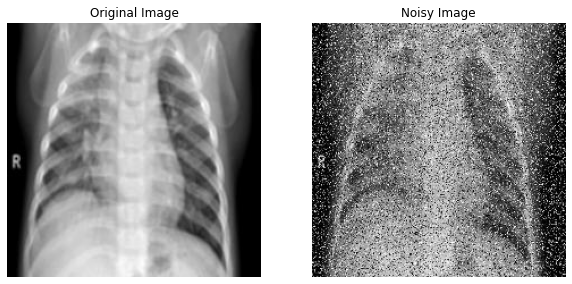

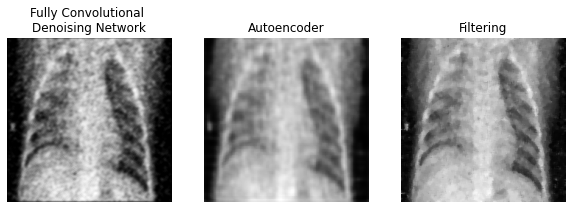

In [78]:
show_comparison_among_denoising(plt.imread(path_coupleA1), plt.imread(path_coupleA2))

1/1 [==============================] - 0s 57ms/step


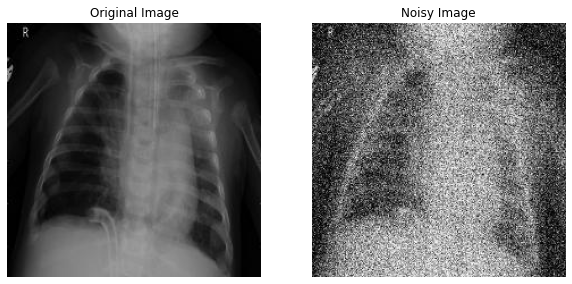

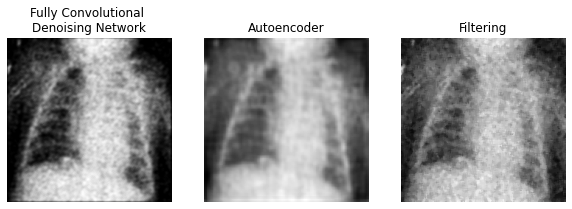

In [79]:
show_comparison_among_denoising(cv2.imread(path_coupleB1), cv2.imread(path_coupleB2))